# Machine Learning With Python for Beginner
## [Pengenalan Machine Learning]
### Terminologi Machine Learning
Dalam pembuatan model machine learning tentunya dibutuhkan data. Sekumpulan data yang digunakan dalam machine learning disebut **DATASET**, yang kemudian dibagi/di-split menjadi training dataset dan test dataset.

**TRAINING DATASET** digunakan untuk membuat/melatih model machine learning, sedangkan **TEST DATASET** digunakan untuk menguji performa/akurasi dari model yang telah dilatih/di-training.

Teknik atau pendekatan yang digunakan untuk membangun model disebut **ALGORITHM** seperti Decision Tree, K-NN, Linear Regression, Random Forest, dsb. dan output atau hasil dari proses melatih algorithm dengan suatu dataset disebut **MODEL**.

Umumnya dataset disajikan dalam bentuk tabel yang terdiri dari baris dan kolom. Bagian Kolom adalah **FEATURE** atau **VARIABEL** data yang dianalisa, sedangkan bagian baris adalah **DATA POINT/OBSERVATION/EXAMPLE**.

Hal yang menjadi target prediksi atau hal yang akan diprediksi dalam machine learning disebut **LABEL/CLASS/TARGET**. Dalam statistika/matematika, **LABEL/CLASS/TARGET** ini dinamakan dengan **Dependent Variabel**, dan **FEATURE** adalah **Independent Variabel**.

Machine Learning itu terbagi menjadi 2 tipe yaitu supervised dan unsupervised Learning. Jika LABEL/CLASS dari dataset sudah diketahui maka dikategorikan sebagai **supervised learning**, dan jika Label belum diketahui maka dikategorikan sebagai **unsupervised learning**.

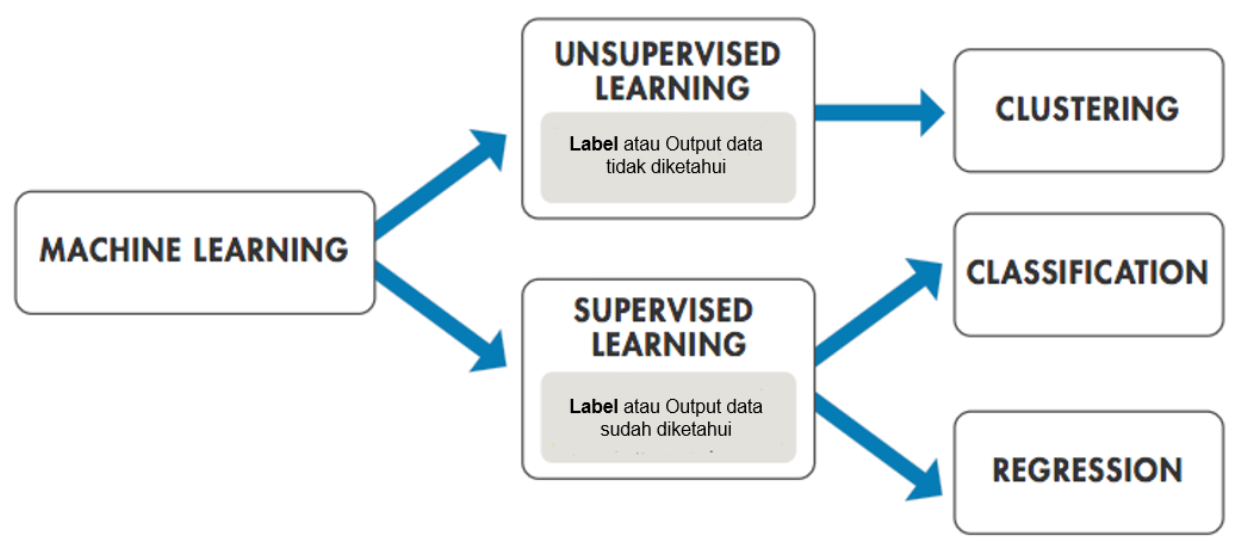

## [Eksplorasi Data & Data Pre-Processing]
### Eksplorasi Data - Memahami Data dengan Statistik

In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

Data eksplorasi tidaklah cukup dengan mengetahui dimensi data dan statistical properties saja, tetapi kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity). Jadi, jika kita sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree.

In [2]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

Mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan.

### Tugas Praktek
Sekarang coba inspeksi nilai korelasi dari fitur-fitur berikut pada dataset_corr yang telah diberikan sebelumnya
1. ExitRates dan BounceRates
2. Revenue dan PageValues
3. TrafficType dan Weekend

In [3]:
print('Korelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates','ExitRates'])
print('Korelasi Revenue-PageValues:', dataset_corr.loc['Revenue','PageValues'])
print('Korelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType','Weekend'])

Korelasi BounceRates-ExitRates: 0.9134364214595573
Korelasi Revenue-PageValues: 0.49256929525120574
Korelasi TrafficType-Weekend: -0.0022212292430310644


### Eksplorasi Data - Memahami Data dengan Visual
Selain dengan statistik, kita juga bisa melakukan eksplorasi data dalam bentuk visual. Dengan visualisasi kita dapat dengan mudah dan cepat dalam memahami data, bahkan dapat memberikan pemahaman yang lebih baik terkait hubungan setiap variabel/ features.

Misalnya kita ingin melihat distribusi label dalam bentuk visual, dan jumlah pembelian saat weekend. Kita dapat memanfaatkan **matplotlib** library untuk membuat chart yang menampilkan perbandingan jumlah yang membeli (1) dan tidak membeli (0), serta perbandingan jumlah pembelian saat weekend

C:\Users\fajar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fajar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


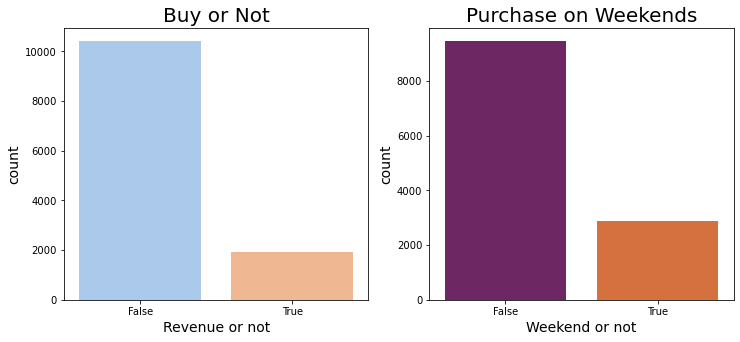

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette='pastel')
plt.title('Buy or Not', fontsize=20)
plt.xlabel('Revenue or not', fontsize=14)
plt.ylabel('count', fontsize=14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette='inferno')
plt.title('Purchase on Weekends', fontsize=20)
plt.xlabel('Weekend or not', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

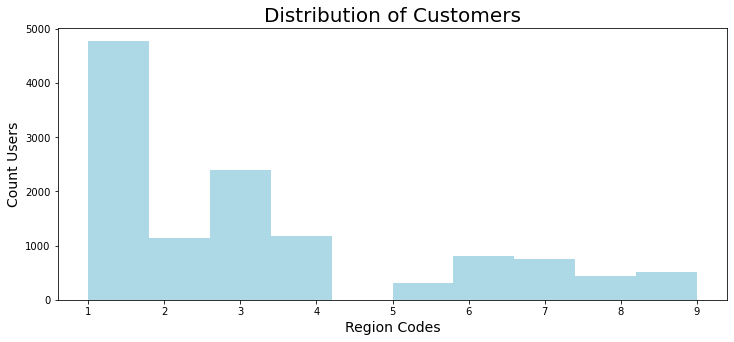

In [5]:
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

### Data Pre-Processing: Handling Missing Value
Setelah kita melakukan eksplorasi data, kita akan melanjutkan ke tahap data pre-processing. Seperti yang saya jelaskan sebelumnya, raw data kita belum tentu bisa langsung digunakan untuk pemodelan. Jika kita memiliki banyak missing value, maka akan mengurangi performansi model dan juga beberapa algorithm machine learning tidak dapat memproses data dengan missing value. Oleh karena itu, kita perlu mengecek apakah terdapat missing value dalam data atau tidak. Jika tidak, maka kita tidak perlu melakukan apa-apa dan bisa melanjutkan ke tahap berikutnya. Jika ada, maka kita perlu melakukan treatment khusus untuk missing value ini

In [6]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


Ada beberapa metode yang dapat kita lakukan untuk menangani missing value. Pilihanmu tepat, Aksara,  menghapus data adalah salah satunya. Tetapi, metode ini tidak dapat serta merta diimplementasikan. Kita juga perlu menganalisis penyebaran missing value, dan berapa persen jumlah missing value dalam data kita.

Metode ini dapat diterapkan jika tidak banyak missing value dalam data, sehingga walaupun data point ini dihapus, kita masih memiliki sejumlah data yang cukup untuk melatih model Machine Learning. Tetapi jika kita memiliki banyak missing value dan tersebar di setiap variabel, maka metode menghapus missing value tidak dapat digunakan. Kita akan kehilangan sejumlah data yang tentunya mempengaruhi performansi model. Kita bisa menghapus data point yang memiliki missing value dengan fungsi **.dropna( )** dari pandas library. Fungsi dropna( ) akan menghapus data point atau baris yang memiliki missing value

In [7]:
#Drop rows with missing value   
dataset_clean = dataset.dropna(axis=0, how='any')
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


Kita bisa menggunakan metode **impute missing value**, yaitu mengisi record yang hilang ini dengan suatu nilai. Ada berbagai teknik dalam metode imputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model. Untuk kasus ini, kita akan menggunakan imputing sederhana yaitu menggunakan nilai rataan atau mean. Imputing missing value sangat mudah dilakukan di Python, cukup memanfaatkan fungsi **.fillna()** dan **.mean()** dari Pandas

In [8]:
print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())


After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
0


C:\Users\fajar\AppData\Local\Temp/ipykernel_15080/935517044.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


### Data Pre-Processing: Scaling
Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan **.MinMaxScaler( )** dari Scikit-Learn library.

In [9]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


### Data Pre-Processing: Konversi String ke Numerik
Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris. Kita dapat menggunakan **LabelEncoder** dari sklearn.preprocessing

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


## [Pemodelan dengan Scikit-Learn]

Scikit-learn adalah library untuk machine learning bagi para pengguna python yang memungkinkan kita melakukan berbagai pekerjaan dalam Data Science, seperti regresi (regression), klasifikasi (classification), pengelompokkan/penggugusan (clustering), data preprocessing, dimensionality reduction, dan model selection (pembandingan, validasi, dan pemilihan parameter maupun model).

### Features dan Label
Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom **Revenue** yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam **Features** dan **Label/Target**. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai **X** dan **[Revenue]** adalah variabel Target yang dideklarasikan sebagai **y**. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.

In [11]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis=1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


### Training dan Test Dataset
Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.
Hal penting yang perlu diketahui adalah **scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array**. Tetapi kalian tidak perlu khawatir, fungsi **train_test_split( )** dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array.

In [12]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


### Training Model: Fit
Sekarang saatnya kita melatih model atau training. Dengan Scikit-Learn, proses ini menjadi sangat sederhana. Kita cukup memanggil nama algorithm yang akan kita gunakan, biasanya disebut classifier untuk problem klasifikasi, dan regressor untuk problem regresi.

Kita akan menggunakan Decision Tree. Kita hanya perlu memanggil fungsi **DecisionTreeClassifier()** yang kita namakan “model”. Kemudian menggunakan fungsi **.fit()** dan X_train, y_train untuk melatih classifier tersebut dengan training dataset

In [13]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)

### Training Model: Predict
Setelah model/classifier terbentuk, selanjutnya kita menggunakan model ini untuk memprediksi LABEL dari testing dataset (X_test), menggunakan fungsi **.predict()**. Fungsi ini akan mengembalikan hasil prediksi untuk setiap data point dari X_test dalam bentuk array. Proses ini kita kenal dengan TESTING

In [14]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)

### Evaluasi Model Performance
Sekarang kita melanjutkan di tahap terakhir dari modelling yaitu evaluasi hasil model. Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda. Sekarang saya akan menjelaskan sedikit metrik apa saja yang umumnya digunakan. Metrik paling sederhana untuk mengecek performansi model adalah **accuracy**.

Kita bisa munculkan dengan fungsi **.score( )**. Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan **Confusion Matrix**. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML.

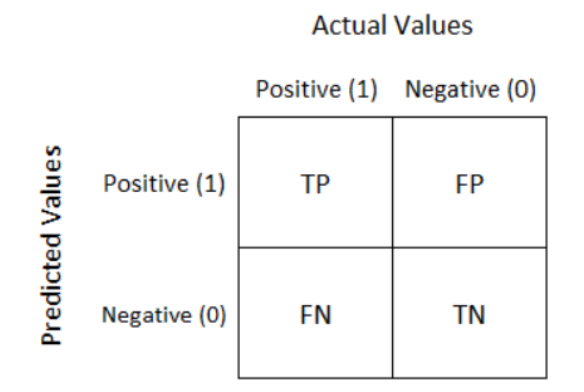

1. **True Positive (TP)**: Jika user diprediksi membeli (Positif), dan user aktualnya benar membeli (Positif).
2. **True Negative (TN)**: Jika user diprediksi tidak membeli (Negatif) dan user aktualnya tidak membeli (Negatif).
3. **False Positive (FP)**: Jika user diprediksi membeli (Positif), tetapi user ternyata aktualnya tidak membeli (Negatif).
4. **False Negatif (FN**): Jika user diprediksi tidak membeli (Negatif), tetapi user ternyata aktualnya membeli (Positif).

Untuk menampilkan confusion matrix cukup menggunakan fungsi **confusion_matrix()** dari Scikit-Learn.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.8560421735604218

Confusion matrix:
[[1879  165]
 [ 190  232]]


Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :
1. Accuracy = (TP + TN ) / (TP+FP+FN+TN)
2. Precision = (TP) / (TP+FP)
3. Recall = (TP) / (TP + FN)
4. F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

Tidak perlu menghitung nilai ini secara manual. Cukup gunakan  fungsi **classification_report()** untuk memunculkan hasil perhitungan metrik - metrik tersebut.

In [16]:
# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2044
        True       0.58      0.55      0.57       422

    accuracy                           0.86      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.85      0.86      0.85      2466



### Memilih Matrix Evaluasi
Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan **Accuracy**, tetapi jika tidak seimbang, maka sebaiknya menggunakan **F1-Score**.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan **Recall**.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan **Precision**.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya tidak SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).


#### Contoh Cara Membaca Classification Report

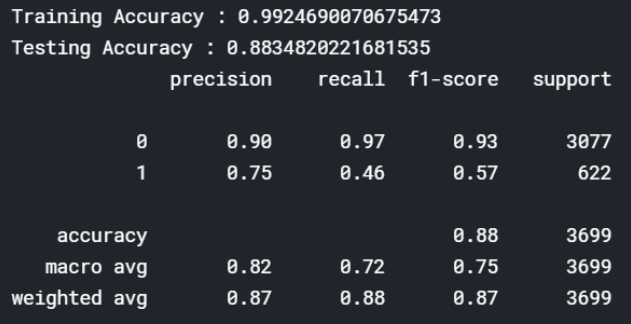

Nilai recall dan F1-score yang kecil untuk class 1 (membeli) dan cukup tinggi untuk class 0 (tidak membeli) menunjukkan bahwa model cenderung salah mengklasifikasikan customer sebagai tidak membeli.

## [Supervised Learning]
### Classification - Logistic Regression
Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa **categorical/discrete value**.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem. Logistic regression adalah salah satu linear classifier, oleh karena itu, Logistik regression juga menggunakan rumus atau fungsi yang sama seperti linear regression yaitu:

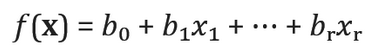

yang disebut Logit, dimana Variabel 𝑏₀, 𝑏₁, …, 𝑏ᵣ adalah koefisien regresi, dan 𝑥₁, …, 𝑥ᵣ adalah explanatory variable/variabel input atau feature.

Output dari Logistic Regression adalah 1 atau 0; sehingga real value dari fungsi logit ini perlu ditransfer ke nilai di antara 1 dan 0 dengan menggunakan fungsi sigmoid.

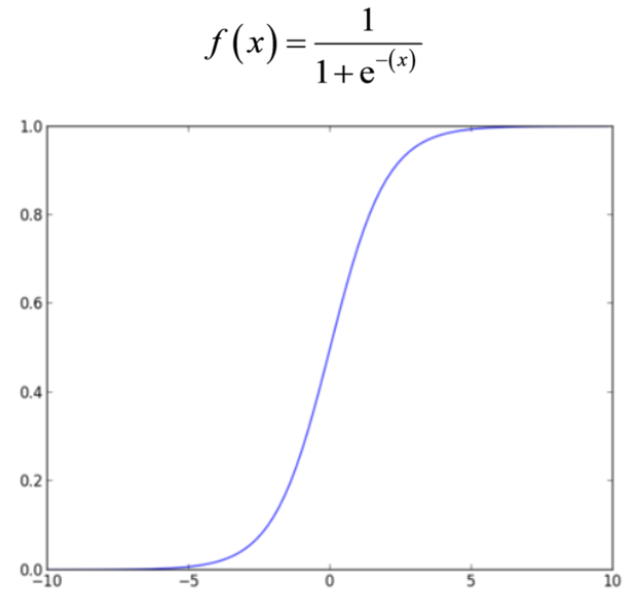

Jadi, jika output dari fungsi sigmoid bernilai lebih dari 0.5, maka data point diklasifikasi ke dalam label/class: 1 atau YES; dan kurang dari 0.5, akan diklasifikasikan ke dalam label/class: 0 atau NO.

### Pemodelan Permasalahan Klasifikasi dengan Logistic Regression
Pemodelan Logistic Regression dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu **online_raw**, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul **linear_model** dari Scikit-learn, dan memanggil fungsi **LogisticRegression()** yang diberi nama **logreg**.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8807785888077859
Testing Accuracy : 0.8580697485806975

Confusion matrix
[[2009   35]
 [ 315  107]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



C:\Users\fajar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Classification - Decision Tree
Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut:

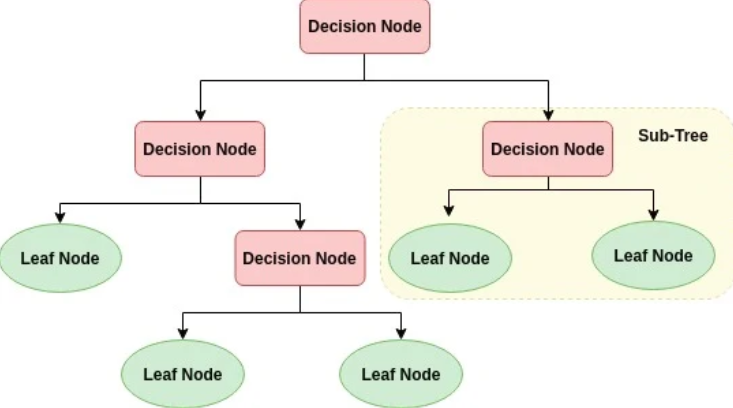

Decision tree terdiri dari :
1. Decision Node yang merupakan feature/input variabel;
2. Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
3. Leaf yang merupakan output/hasil.

Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :

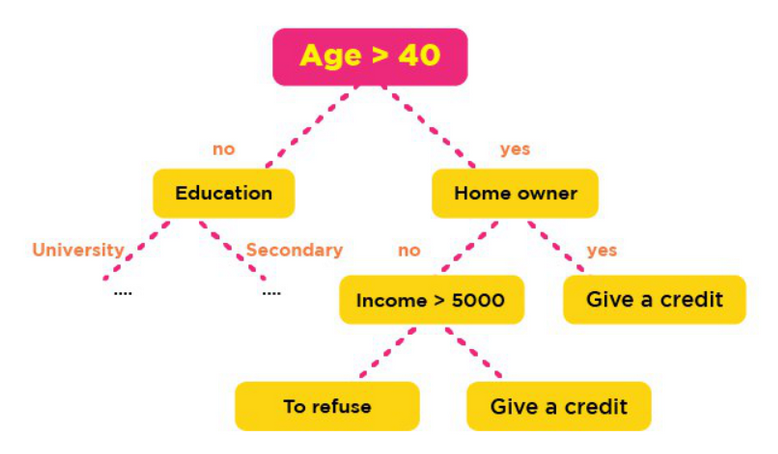

Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

Seperti yang sudah dilakukan dalam prosedur pemodelan machine learning, selanjutnya dapat dengan mudah melakukan pemodelan decision tree dengan menggunakan scikit-learn module, yaitu **DecisionTreeClassifier**.

### Tugas Praktek
Dengan menggunakan dataset online_raw.csv dan diasumsikan sudah melakukan EDA dan pre-processing, aku akan membuat model machine learning dengan menggunakan decision tree :
1. Import DecisionTreeClassifier dan panggil fungsi tersebut dengan nama decision_tree
2. Split dataset ke dalam training & testing dataset dengan perbandingan 70:30, dengan random_state = 0
3. Latih model dengan training feature (X_train) dan training target (y_train) menggunakan .fit()
4. Evaluasi hasil model decision_tree yang sudah dilatih dengan testing feature (X_test) dan print nilai akurasi dari training dan testing dengan fungsi .score()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.862124898621249


### Regression: Linear Regression
Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (independent variables atau features) dan variabel output (dependent variables atau label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

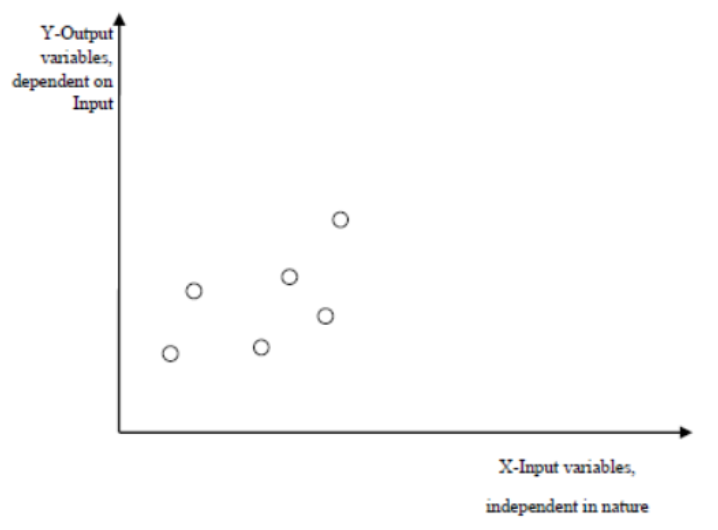

Model regresi terdiri atas 2 tipe yaitu :
1. Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
2. Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).
Adapun model regresi yang paling umum digunakan adalah Linear Regression.

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (label atau target) dan independent variabel (features). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun).

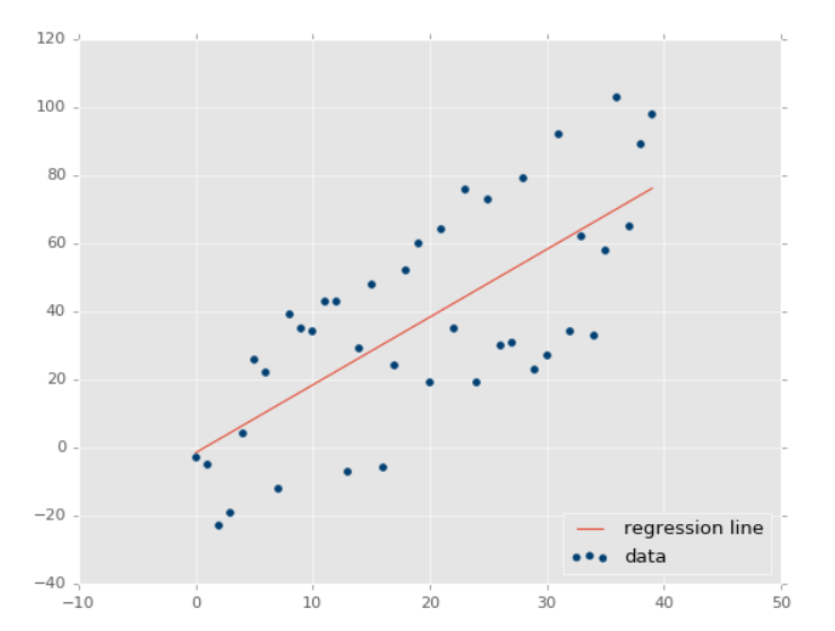

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa **asumsi yang harus dipenuhi**, yaitu :
1. Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
2. Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency (ketergantungan) antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
3. Tidak ada autocorrelation dalam data, contohnya pada time-series data.

Pemodelan Linear regression menggunakan scikit-learn tidaklah sulit. Secara prosedur serupa dengan pemodelan logistic regression. Cukup memanggil LinearRegression dengan terlebih dahulu meng-import fungsi tersebut

### Tugas Praktek
1. Pisahkan dataset ke dalam Feature dan Label, gunakan fungsi .drop(). Pada dataset ini, label/target adalah variabel MEDV
2. Checking dan print jumlah data setelah Dataset pisahkan ke dalam Feature dan Label, gunakan .shape()
3. Bagi dataset ke dalam Training dan test dataset, 70% data digunakan untuk training dan 30% untuk testing, gunakan fungsi train_test_split() , dengan random_state = 0
4. Checking dan print kembali jumlah data dengan fungsi .shape()
5. Import LinearRegression dari sklearn.linear_model
6. Deklarasikan  LinearRegression regressor dengan nama reg
7. Fit regressor ke training dataset dengan .fit(), dan gunakan .predict() untuk memprediksi nilai dari testing dataset.

In [19]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


### Regression Performance Evaluation
Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan:
1. **Mean Squared Error (MSE)** adalah rata-rata dari squared error

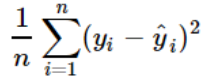

2. **Root Mean Squared Error (RMSE)** adalah akar kuadrat dari MSE

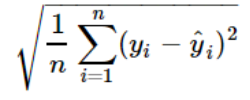

3. **Mean Absolute Error (MAE)** adalah rata-rata dari nilai absolut error

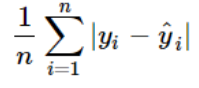

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi **mean_squared_error()** ,  **mean_absolute_error()** dari **scikit-learn.metrics** dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.

### Tugas Praktek
1. Import library yang digunakan: mean_squared_error, mean_absolute_error dari  sklearn.metrics dan numpy sebagai aliasnya yaitu np. Serta, import juga matplotlib.pyplot sebagai aliasnya, plt.
2. Hitung dan print nilai MSE dan RMSE dengan menggunakan argumen y_test dan y_pred, untuk rmse gunakan np.sqrt()
3. Buat scatter plot yang menggambarkan hasil prediksi (y_pred) dan harga actual (y_test)

Mean squared error of testing set: 0.010913024655841005
Mean absolute error of testing set: 0.0778989610312069
Root Mean Squared Error of testing set: 0.10446542325497468


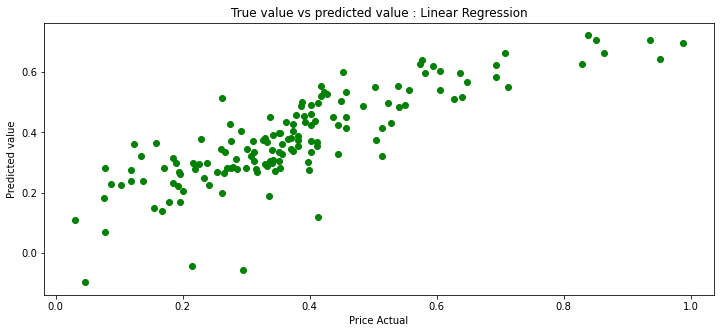

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

## [Unsupervised Learning]

### Pendahuluan
**Unsupervised Learning** adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain. Contohnya pada gambar berikut:

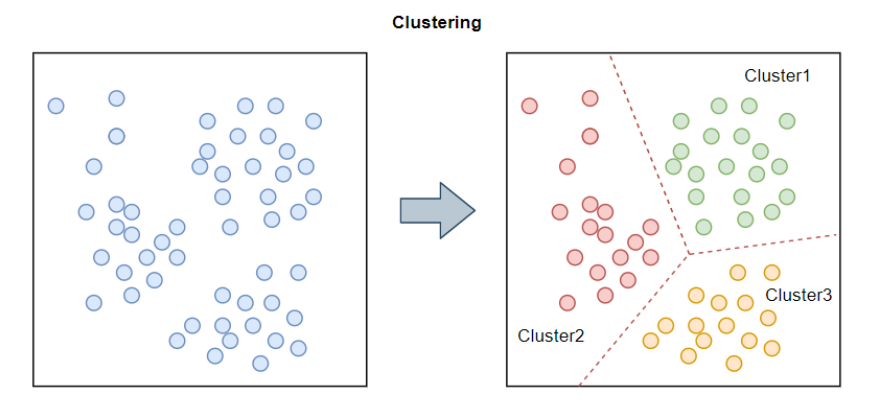

### K-Means Clustering
**K-Means** merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat. Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski.

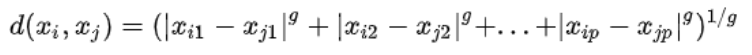

xi , xj adalah dua buah data yang akan dihitung jaraknya, dan p = dimensi/jumlah dari data.

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu :
1. Jarak Manhattan di mana g = 1
2. Jarak Euclidean di mana g = 2
3. Jarak Chebychev di mana g = ∞

**Mekanisme K-Means Clustering:**
Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data.
Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah

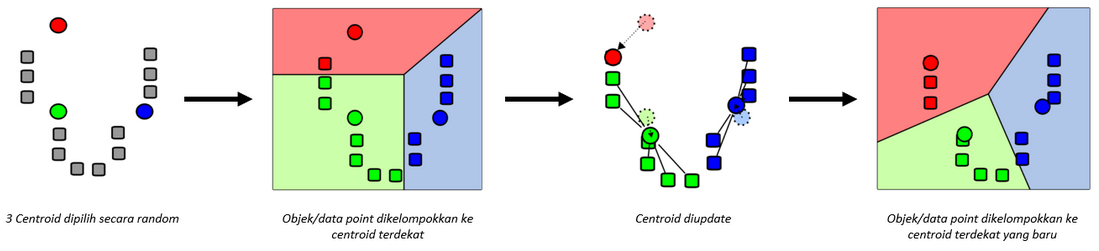

Secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data.

### Tugas Praktek : Customer Segmentation dengan K-Means Clustering
Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score.  Adapun tujuan dari clustering adalah untuk memahami customer - customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer.


1. Import pandas sebagai aliasnya dan **KMeans** dari **sklearn.cluster**.
2. Load dataset 'https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv' dan beri nama dataset
3. Diasumsikan EDA dan preprocessing sudah dilakukan, selanjutnya kita memilih feature yang akan digunakan untuk membuat model yaitu annual_income dan spending_score. Assign dataset dengan feature yang sudah dipilih ke dalam 'X'. Pada dasarnya terdapat teknik khusus yang dilakukan untuk menyeleksi feature - feature (**Feature Selection**) mana saja yang dapat digunakan untuk machine learning modelling, karena tidak semua feature itu berguna. Beberapa feature justru bisa menyebabkan performansi model menurun. Tetapi untuk problem ini, secara default kita akan menggunakan annual_income dan spending_score.
3. Deklarasikan  **KMeans( )**  dengan nama cluster_model dan gunakan n_cluster = 5. **n_cluster** adalah argumen dari fungsi KMeans( ) yang merupakan jumlah cluster/centroid (K).  random_state = 24.
4. Gunakan fungsi **.fit_predict( )** dari cluster_model pada 'X'  untuk proses clustering.


In [21]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

C:\Users\fajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Inspect & Visualizing the Cluster
1. Pertama - tama, import matplotlib.pyplot dan beri inisial plt.
2. Gunakan fungsi .values untuk mengubah tipe ‘X’ dari dataframe menjadi array
3. Pisahkan X kedalam xs dan ys, di mana xs adalah Kolom index [0] dan ys adalah kolom index [1]
4. Buatlah scatter plot plt.scatter() dari xs dan ys, kemudian tambahkan c = labels untuk secara otomatis memberikan warna yang berbeda pada setiap cluster, dan alpha = 0.5 ke dalam scatter plot argumen.
5. Hitunglah koordinat dari centroid menggunakan .cluster_centers_ dari cluster_model, deklarasikan ke dalam variabel centroids.
6. Pisahkan centroids kedalam centroids_x dan centroids_y, di mana centroids_x adalah kolom index [0] dan centroids_y adalah kolom index [1]
7. Buatlah scatter plot dari centroids_x dan centroids_y , gunakan ‘D’ (diamond) sebagai marker parameter, dengan ukuran 50, s = 50


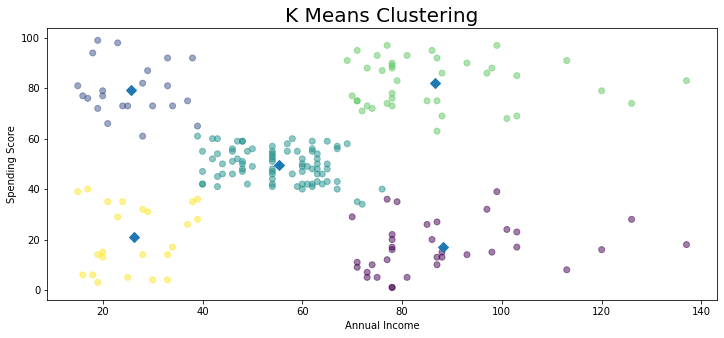

In [22]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Measuring Cluster Criteria
Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan **inertia**. Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, **semakin kecil nilai inertia maka semakin baik**. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset

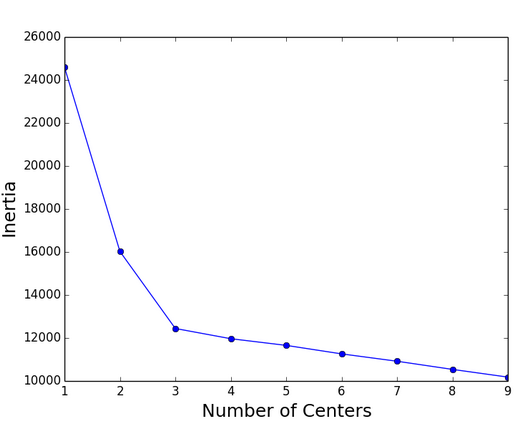

Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “**elbow**” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.

Untuk membuat inertia plot, silakan memanfaatkan fungsi looping (for):
1. Pertama - tama, buatlah sebuah list kosong yang dinamakan 'inertia'. List ini akan kita gunakan untuk menyimpan nilai inertia dari setiap nilai K.
2. Gunakan for untuk membuat looping dengan range 1-10. Sebagai index looping gunakan k
3. Di dalam fungsi looping, deklarasikan  KMeans()  dengan nama cluster_model dan gunakan n_cluster = k, dan random_state = 24
4. Gunakan fungsi **.fit()** dari **cluster_model** pada 'X'
5. Dari cluster_model yang sudah di-fit ke dataset, dapatkan nilai inertia menggunakan **inertia_** dan deklarasikan sebagai inertia_value
6. Append inertia_value ke dalam list 'inertia'
7. Setelah iterasi/looping selesai plotlah list 'inertia' tadi sebagai ordinat-nya dan absica-nya adalah range(1, 10).


C:\Users\fajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fajar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

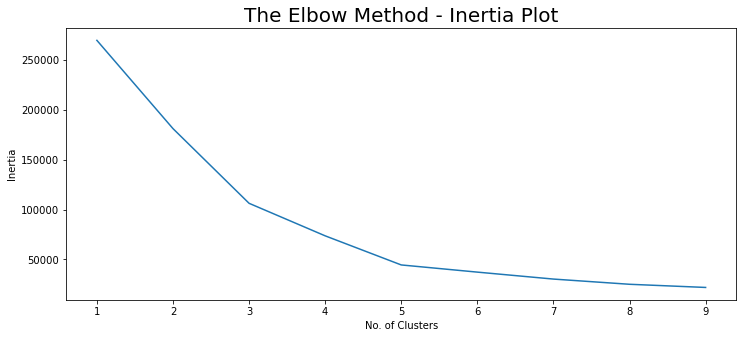

In [23]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

## [Mini Project]
### Case Study: Promos for Our E-Commerce
Aku akan membuat machine learning model untuk menyelesaikan permasalahan dari e-commerce divisi kantor.
Adapun feature - feature dalam dataset ini adalah :
1. 'Daily Time Spent on Site' : lama waktu user mengunjungi site (menit)
2. 'Age' : usia user (tahun)
3. 'Area Income' : rata - rata pendapatan di daerah sekitar user
4. 'Daily Internet Usage' : rata - rata waktu yang dihabiskan user di internet dalam sehari (menit)
5. 'Ad Topic Line' : topik/konten dari promo banner
6. 'City' : kota dimana user mengakses website
7. 'Male' : apakah user adalah Pria atau bukan
8. 'Country' : negara dimana user mengakses website
9. 'Timestamp' : waktu saat user mengklik promo banner atau keluar dari halaman website tanpa mengklik banner
10. 'Clicked on Ad' : mengindikasikan user mengklik promo banner atau tidak (0 = tidak; 1 = klik).

In [24]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

In [25]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.

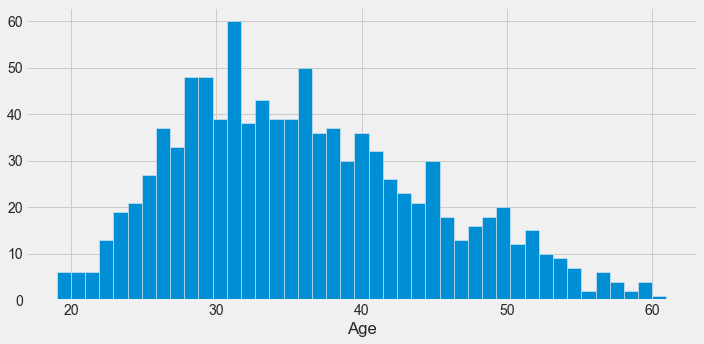

<Figure size 864x360 with 0 Axes>

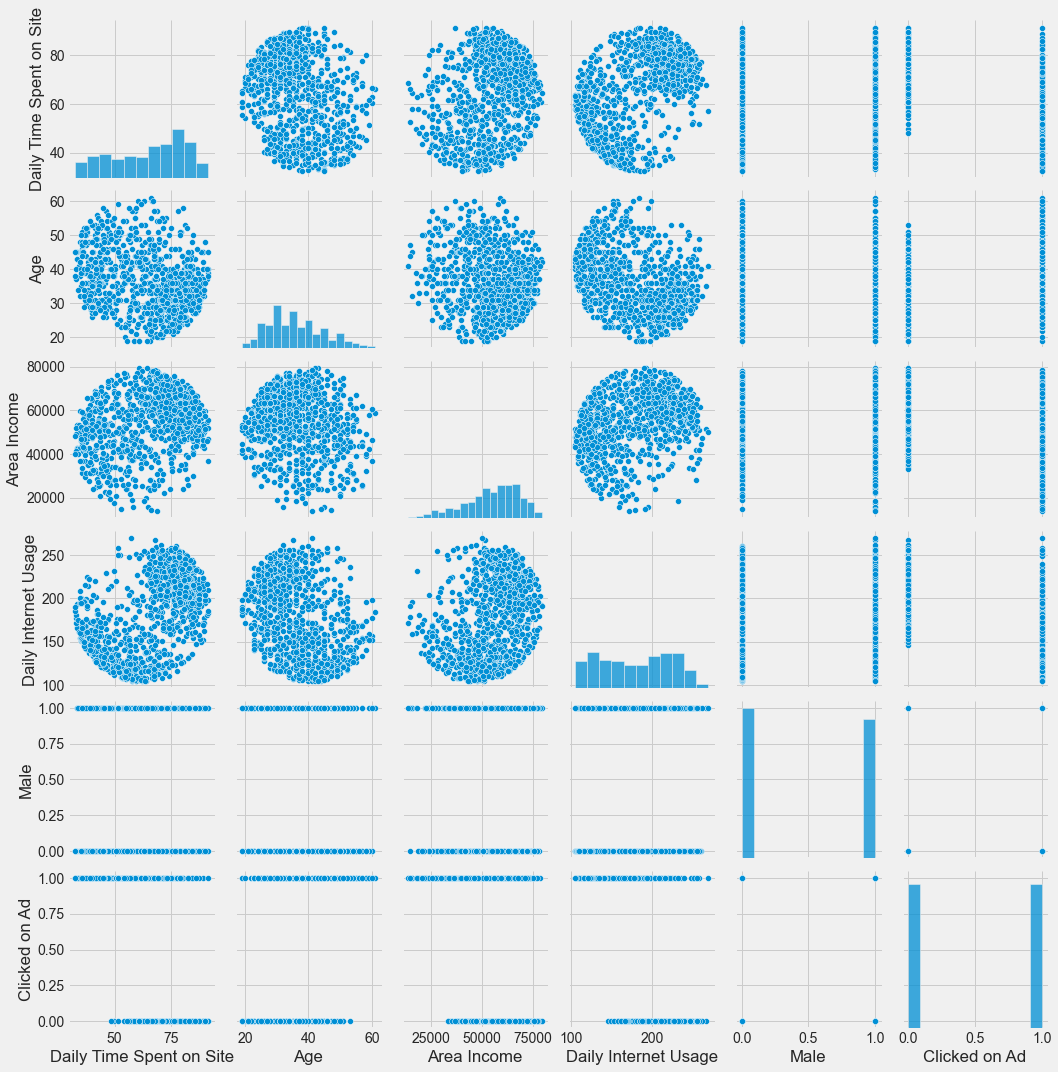

In [26]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

In [27]:
#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum().sum())


[5] Cek missing value
0


In [29]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers,
#and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


In [30]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Model sudah sangat baik dalam memprediksi user yang akan mengklik website atau tidak, dapat dilihat dari nilai accuracy = 0.90; Dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performansi dapat menggunakan metrik Accuracy.

## [Kesimpulan]
Berdasarkan materi-materi yang telah kupelajari dan praktekkan dalam modul ini, aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya
1. Memahami apa itu machine learning dengan jenisnya untuk pemodelan
2. Memahami dan mampu melakukan Eksplorasi Data & Data Pre-processing
3. Memahami dan mampu melakukan proses-proses Pemodelan dengan Scikit-Learn
4. Memahami dan mampu melakukan proses-proses pemodelan dengan menggunakan algoritma pada Supervised Learning
5. Memahami dan mampu melakukan proses-proses pemodelan dengan menggunakan algoritma pada Unsupervised Learning
6. Mengerjakan mini project yang merupakan integrasi keseluruhan materi dan tentunya materi-materi pada modul-modul sebelumnya untuk menyelesaikan persolan bisnis.
